In [1]:
import numpy as np
import scipy.stats as sts
import pdb
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import integrate
Macs_income = np.loadtxt('/Users/donghaiy/Desktop/Macs_30100/persp-model_W18/ProblemSets/PS2/incomes.txt')
Macs_income

array([  51253.49715631,  100630.32024137,   83009.27613739,
         82882.10654304,   77338.29483892,   81071.64131675,
         84760.04353269,   74599.0967193 ,   94687.36110452,
         76720.48678222,   84669.65776296,   79707.04914362,
        100026.64050846,   89828.42639587,   74006.05604302,
        103281.1855776 ,   88586.79236711,  133631.92813961,
         91519.53047238,  106863.33198279,   89622.32208316,
         63803.24097245,   99116.670934  ,  135865.02679613,
         61344.18577082,   99182.27630779,   55038.04861413,
         71353.56078829,   90880.19896459,   80950.37075039,
         84724.93806271,   91236.88284731,   91628.21297882,
        105243.4671147 ,   71500.93550933,   56162.05440841,
         78935.2939267 ,   81097.09361259,  130354.71406191,
        112159.02216504,   82259.96409801,   75699.52604273,
         71699.30209176,   93487.89133203,  120723.60773086,
        113045.98795795,   70752.04409433,  103679.41128338,
         62517.62724779,

## (a) Plot a histogram of percentages of the income.txt data with 30 bins.

<IPython.core.display.Javascript object>


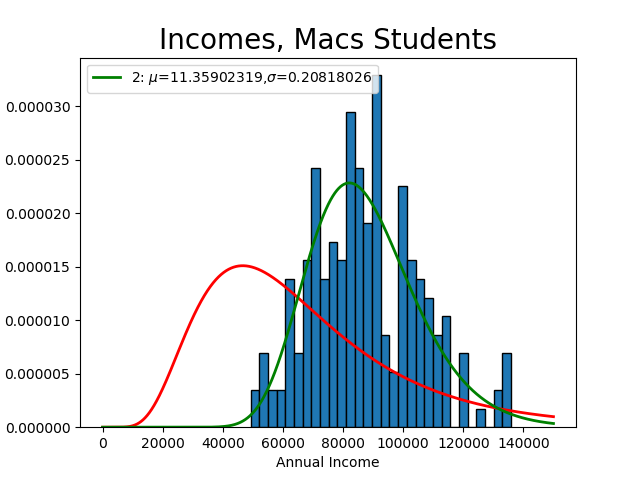

(0, 150000)

In [2]:
import matplotlib.pyplot as plt
# This next command is specifically for Jupyter Notebook
%matplotlib notebook
count, bins, ignored = plt.hist(Macs_income, 30, edgecolor='black', normed=True)
plt.title('Incomes, Macs Students', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Percent for Certain Incomes')
plt.xlim([0, 150000])  # This gives the xmin and xmax to be plotted"
# Don't set this figure until have played with the figure below

# (b)
## construct the class as log-normal distributed.

In [3]:
# Define the function get_pdf
mu_1 = 11
sigma_1 = 0.5
x_1 = np.linspace(0, 150000, 150000)
def get_lognorm(x, mu, sigma):
    pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
    return pdf
# Plot the graph
pdf = get_lognorm(x_1, mu_1, sigma_1)
plt.plot(x_1, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

/Users/donghaiy/Desktop/Macs_30100/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/donghaiy/Desktop/Macs_30100/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [4]:
# Define log likelihood function for the normal distribution
def log_lik_lognorm(x, mu, sigma):
    pdf_vals = get_lognorm(x, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood 1 where mu = 11, sigma = 0.5:', log_lik_lognorm(Macs_income, mu_1, sigma_1))


Log-likelihood 1 where mu = 11, sigma = 0.5: -2385.85699781


## (C)

In [5]:
def crit(params, *args):
    mu, sigma = params
    x, cutoff = args
    log_lik_val = log_lik_lognorm(x, mu, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [6]:
import scipy.optimize as opt #
mu_init = 11  
sig_init = 0.1  
params_init = np.array([mu_init, sig_init])
mle_args = (Macs_income, 150000)
results = opt.minimize(crit, params_init, args=(mle_args), # constrained optimization first then use unconstrained 
                       method="TNC",
                       bounds=((1e-10, None),(1e-10, None)))
mu_MLE, sig_MLE = results.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
# 1, we get initial guess which is 11, and 0.5
# 2, we get results from constrained minimazation 11.35 and 0.208
# 3, we calculate the log likelihood of both 1 and 2, and compare them

mu_MLE= 11.3590231864  sig_MLE= 0.208180264286


In [7]:
# Plot the MLE estimated distribution, see the graph above
plt.plot(x_1, get_lognorm(x_1, mu_MLE, sig_MLE),
         linewidth=2, 
         color='g', 
         label='2: $\mu$=11.35902319,$\sigma$=0.20818026')
plt.legend(loc='upper left')
plt.savefig('MLEplots.png')

/Users/donghaiy/Desktop/Macs_30100/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/donghaiy/Desktop/Macs_30100/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [8]:
print("The MLE estimates for mu is", mu_MLE, ", sigma is", sig_MLE, ", and value for likelihood function is", 
     log_lik_lognorm(Macs_income, mu_MLE, sig_MLE))


The MLE estimates for mu is 11.3590231864 , sigma is 0.208180264286 , and value for likelihood function is -2241.7193014


In [9]:
results
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = ', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

AttributeError: hess_inv

## (d)

In [10]:

log_lik_h0 = log_lik_lognorm(Macs_income, mu_1, sigma_1)
log_lik_mle = log_lik_lognorm(Macs_income, mu_MLE, sig_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('Chi-squared test of H0 with 2 degrees of freedom p-value = {}, h0 is rejectced'.format(pval_h0))

Chi-squared test of H0 with 2 degrees of freedom p-value = 0.0, h0 is rejectced


It can be argued that the data in the incomes.txt are unlikely obtained from the distribution in part (b).

## (e)

In [11]:
p_1 =  1 - sts.lognorm.cdf(100000, scale = np.exp(mu_MLE), s = sig_MLE)
p_2 = sts.lognorm.cdf(75000, scale = np.exp(mu_MLE), s = sig_MLE)
print("The probability that MACSS students will earn more than $100,000 is {:.2f} and \
the probability they earn less than $75,000 is {:.2f}.".format(p_1, p_2))

The probability that MACSS students will earn more than $100,000 is 0.23 and the probability they earn less than $75,000 is 0.26.


# Problem II
a) Estimate the parameters of the model (β0; β1; β2; β3; σ2) by maximum likelihood using the fact that each error term is distributed normally N(0, σ2). We can solve the regression equation for error term which tells us that the following equation is distributed normally N(0, σ2). Estimate (β0; β1; β2; β3; σ2) to maximize the likelihood of seeing the data in sick.txt. Report your estimates, the value of the log likelihood function, and the estimated variance covariance matrix of the estimates.

In [12]:
import numpy as np
import pandas as pd
import scipy.stats as sts
# import data
df_sick = pd.read_csv('sick.txt')

In [13]:
#calculate the minimum of log likelihood
def crit(params, *args):
    
    b0, b1, b2, b3, sigma = params
    df_sick, age, children, temp_winter = args
    error_vals = df_sick - b0 - b1 * age - b2 * children - b3 * temp_winter
    pdf_vals = sts.norm.pdf(error_vals, 0, sigma)
    ln_pdf_vals = np.log(pdf_vals)   # get log
    log_lik_val = ln_pdf_vals.sum()  # sum of log, MLE
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [14]:
# calculate parameters and maximum likelihood value
import scipy.optimize as opt

b0_init =  0 
b1_init =  0 
b2_init = 0 
b3_init = 0
sig_init = 0.1
sick_vals = df_sick["sick"]
age_vals = df_sick["age"]
children_vals = df_sick["children"]
temp_winter_vals = df_sick["avgtemp_winter"]
mu = np.zeros(200)

In [15]:
params_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
mle_args = sick_vals, age_vals, children_vals, temp_winter_vals

results2 = opt.minimize(crit, params_init, args=mle_args, method = "SLSQP", bounds=((None, None),\
                       (None, None), (None, None), (None, None), (1e-10, None)))
b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE = results.x
print('B0: {:.3f}, B1: {:.3f}, B2: {:3f}, B3: {:3f}, sigma: {:3f}, value for MLE function: {:.3f}'.format(b0_MLE,
       b1_MLE, b2_MLE, b3_MLE, sig_MLE, -results.fun))

/Users/donghaiy/Desktop/Macs_30100/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


ValueError: not enough values to unpack (expected 5, got 2)

In [ ]:
results2

In [ ]:
print("The estimated coefficients are:")
print("beta_0 = ", results.x[0])
print("beta_1 = ", results.x[1])
print("beta_2 = ", results.x[2])
print("beta_3 = ", results.x[3])
print("sigma  = ", results.x[4])

In [ ]:
OffDiagNeg = -np.ones(5) + 2 * np.eye(5)
print("OffDiagNeg Matrix is: \n", OffDiagNeg)
np.fill_diagonal(OffDiagNeg, 1)

vcv = results2.hess_inv.todense() * OffDiagNeg
print("VCV matrix is: \n", vcv)

In [ ]:
log_lik_h0  = log_likelihood(sicks, [1, 0, 0, 0], 0.1)
log_lik_mle = log_likelihood(sicks, [results.x[0], results.x[1], results.x[2], results.x[3]], results.x[4])
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print("Log Likelihood is", results.fun)
print('The log likelihood ratio for two esimation is:', log_lik_h0, 'and', log_lik_mle)
print('chi squared of H0 with 5 degrees of freedom p-value = ', pval_h0)